In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 1. Charger les données
file_path = 'Data/FS_sp500_Value.json'
df = pd.read_json(file_path)

# Aperçu des premières lignes
print("Aperçu des données :")
print(df.head())


Aperçu des données :
  Ticker       Date       High        Low       Open      Close   Volume  \
0      A 2010-01-04  22.625179  22.267525  22.453505  22.389128  3815561   
1      A 2010-01-05  22.331903  22.002861  22.324751  22.145924  4186031   
2      A 2010-01-06  22.174536  22.002861  22.067240  22.067240  3243779   
3      A 2010-01-07  22.045780  21.816881  22.017166  22.038628  3095172   
4      A 2010-01-08  22.067240  21.745352  21.917025  22.031473  3733918   

   Adj Close  
0  20.402897  
1  20.181271  
2  20.109568  
3  20.083494  
4  20.076973  


In [21]:
# 2. Exploration des données
print(f"\nNombre de lignes et colonnes : {df.shape}")
print("\nInformations générales :")
print(df.info())
print("\nStatistiques descriptives :")
print(df.describe())

# Détection des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())



Nombre de lignes et colonnes : (1491171, 8)

Informations générales :
<class 'pandas.core.frame.DataFrame'>
Index: 1491171 entries, 0 to 1491170
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Ticker     1491171 non-null  object        
 1   Date       1491171 non-null  datetime64[ns]
 2   High       1491171 non-null  float64       
 3   Low        1491171 non-null  float64       
 4   Open       1491171 non-null  float64       
 5   Close      1491171 non-null  float64       
 6   Volume     1491171 non-null  int64         
 7   Adj Close  1491171 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 102.4+ MB
None

Statistiques descriptives :
                                Date          High           Low  \
count                        1491171  1.491171e+06  1.491171e+06   
mean   2016-04-12 03:42:53.545488128  9.963110e+01  9.744151e+01   
min        

In [23]:
# 3. Gestion des valeurs manquantes
# Supprimer les colonnes avec plus de 50% de valeurs manquantes
missing_threshold = 0.5
df = df.loc[:, df.isnull().mean() < missing_threshold]

# Imputer les valeurs manquantes par la moyenne pour les colonnes numériques
for col in df.select_dtypes(include=[np.number]):
    df[col].fillna(df[col].mean(), inplace=True)

# Vérification post-traitement
print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())



Valeurs manquantes après imputation :
Ticker       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


/var/folders/72/q1xl5wtj72jgpyywtx8sz8w4010g60/T/ipykernel_90518/3025675628.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [25]:
# 4. Détection et suppression des doublons
duplicates = df.duplicated()
print(f"\nNombre de doublons : {duplicates.sum()}")
df = df.drop_duplicates()



Nombre de doublons : 0


In [27]:
# 5. Validation des types de données
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Conversion en datetime


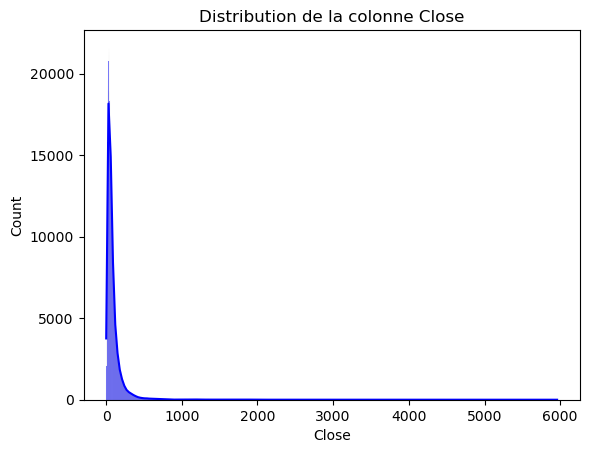

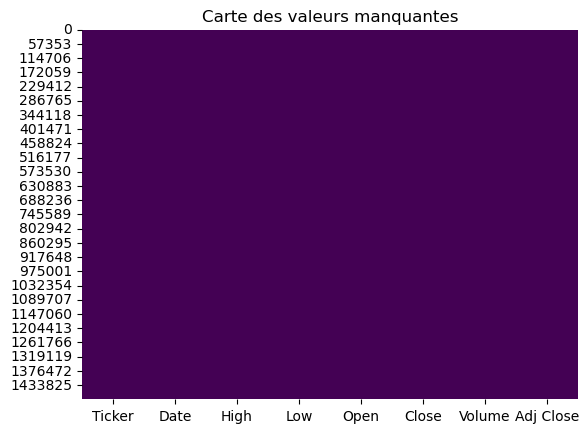

In [29]:
# 6. Visualisation rapide des distributions
# Distribution de la colonne "Close"
sns.histplot(df['Close'], kde=True, color='blue')
plt.title('Distribution de la colonne Close')
plt.show()

# Visualisation des valeurs manquantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()


In [30]:
# 7. Création de nouvelles variables
# Daily Range: High - Low
df['Daily Range'] = df['High'] - df['Low']

# Daily Change (%): ((Close - Open) / Open) * 100
df['Daily Change (%)'] = ((df['Close'] - df['Open']) / df['Open']) * 100

# Vérification des nouvelles variables
print("\nAperçu des nouvelles variables :")
print(df[['Daily Range', 'Daily Change (%)']].head())



Aperçu des nouvelles variables :
   Daily Range  Daily Change (%)
0     0.357655         -0.286712
1     0.329042         -0.801027
2     0.171675          0.000000
3     0.228899          0.097476
4     0.321888          0.522190


In [33]:
# Sauvegarde des données nettoyées et enrichies au format JSON
cleaned_file_path_json = "./FS_sp500_Value_cleaned.json"
df.to_json(cleaned_file_path_json, orient='records', lines=True)  # Sauvegarde au format JSON

print(f"\nDonnées nettoyées et enrichies sauvegardées dans : {cleaned_file_path_json}")




Données nettoyées et enrichies sauvegardées dans : ./FS_sp500_Value_cleaned.json
